# Table of contents

### 1. Import Libraries and Data
### 2. Data Cleaning
### 3. Data Overview
### 4. Numerical Analysis
- Scatterplots
- Pair Plots

### 5. Categorical Analysis
- Cat Plots
- Average Passenger Count by GEO Summary
- Passenger Count Distribution by Activity Type Code (Box Plot)
- Passenger Count by Month (Seasonality - Box Plot)
- Count Plots

### 6. Correlation Heatmap in Seaborn
### 7. Revisit Questions

### 1. Import Libraries and Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os

In [2]:
# Create path
path = r'/Users/bonnieandbanana/Desktop/A New Career/CareerFoundry/Data Immersion/A6_Dashboard/Air_Pax_Traffic_Analysis'

In [3]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data' , 'Prepared Data' , 'air_pax_traffic_data_cleaned.csv'))

In [4]:
df.columns.tolist()

['Unnamed: 0',
 'index',
 'Activity Period',
 'Operating Airline',
 'Operating Airline IATA Code',
 'Published Airline',
 'Published Airline IATA Code',
 'GEO Summary',
 'GEO Region',
 'Activity Type Code',
 'Price Category Code',
 'Terminal',
 'Boarding Area',
 'Passenger Count',
 'Adjusted Activity Type Code',
 'Adjusted Passenger Count',
 'Year',
 'Month']

### 2. Data Cleaning

In [5]:
# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0' , 'index' , 'Activity Period']
df_cleaned = df.drop(columns=columns_to_drop, axis=1)
df_cleaned.head()

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [6]:
# Change column title formats
df_cleaned.columns=df_cleaned.columns.str.replace(" ","_").str.lower()

In [7]:
df_cleaned.dtypes

operating_airline              object
operating_airline_iata_code    object
published_airline              object
published_airline_iata_code    object
geo_summary                    object
geo_region                     object
activity_type_code             object
price_category_code            object
terminal                       object
boarding_area                  object
passenger_count                 int64
adjusted_activity_type_code    object
adjusted_passenger_count        int64
year                            int64
month                          object
dtype: object

### 3. Data Overview

In [8]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_count,14953.0,29345.619006,58398.448380,1.0,5409.0,9260.0,21222.0,659837.0
adjusted_passenger_count,14953.0,29437.338862,58362.879319,1.0,5523.0,9418.0,21267.0,659837.0
year,14953.0,2010.380325,3.140994,2005.0,2008.0,2010.0,2013.0,2016.0


In [9]:
df_cleaned.groupby("month").describe().T

month                                   April         August       December  \
passenger_count          count    1141.000000    1303.000000    1255.000000   
                         mean    29013.929010   32811.210284   28814.313147   
                         std     56440.013665   65700.979500   57635.076489   
                         min         4.000000       6.000000       1.000000   
                         25%      5062.000000    6170.000000    5526.500000   
                         50%      9681.000000   10116.000000    9168.000000   
                         75%     20984.000000   24285.000000   19492.500000   
                         max    397287.000000  659837.000000  556208.000000   
adjusted_passenger_count count    1141.000000    1303.000000    1255.000000   
                         mean    29110.304996   32916.747506   28898.130677   
                         std     56400.620817   65660.521421   57601.880692   
                         min         8.000000       6.000000       2.000000   
                         25%      5185.000000    6305.000000    5677.000000   
                         50%      9832.000000   10258.000000    9351.000000   
                         75%     20984.000000   24285.000000   19492.500000   
                         max    397287.000000  659837.000000  556208.000000   
year                     count    1141.000000    1303.000000    1255.000000   
                         mean     2010.520596    2009.965464    2010.010359   
                         std         2.873772       3.156376       3.179237   
                         min      2006.000000    2005.000000    2005.000000   
                         25%      2008.000000    2007.000000    2007.000000   
                         50%      2011.000000    2010.000000    2010.000000   
                         75%      2013.000000    2013.000000    2013.000000   
                         max      2015.000000    2015.000000    2015.000000   

month                                February        January           July  \
passenger_count          count    1254.000000    1264.000000    1299.000000   
                         mean    24277.580542   26176.762658   32756.965358   
                         std     47583.134096   51355.079057   65385.142473   
                         min         1.000000       1.000000       1.000000   
                         25%      4614.750000    5247.000000    6275.500000   
                         50%      7711.000000    9060.000000   10440.000000   
                         75%     16712.750000   18804.500000   24663.000000   
                         max    351096.000000  482915.000000  625885.000000   
adjusted_passenger_count count    1254.000000    1264.000000    1299.000000   
                         mean    24358.844498   26262.553797   32867.483449   
                         std     47551.165848   51321.005971   65342.554705   
                         min         2.000000       1.000000       1.000000   
                         25%      4732.500000    5378.500000    6419.500000   
                         50%      7800.500000    9194.000000   10629.000000   
                         75%     16712.750000   18804.500000   24663.000000   
                         max    351096.000000  482915.000000  625885.000000   
year                     count    1254.000000    1264.000000    1299.000000   
                         mean     2011.075758    2011.018987    2009.977675   
                         std         3.186639       3.198072       3.148648   
                         min      2006.000000    2006.000000    2005.000000   
                         25%      2008.000000    2008.000000    2007.000000   
                         50%      2011.000000    2011.000000    2010.000000   
                         75%      2014.000000    2014.000000    2013.000000   
                         max      2016.000000    2016.000000    2015.000000   

month                                    June   

In [10]:
df_cleaned.groupby("operating_airline")["passenger_count"].describe().T

operating_airline,ATA Airlines,Aer Lingus,Aeromexico,Air Berlin,Air Canada,Air Canada Jazz,Air China,Air France,Air India Limited,Air New Zealand,...,Turkish Airlines,US Airways,United Airlines,United Airlines - Pre 07/01/2013,Virgin America,Virgin Atlantic,WestJet Airlines,World Airways,XL Airways France,Xtra Airways
count,44.000000,98.000000,180.000000,36.000000,366.000000,14.000000,259.000000,258.000000,8.000000,259.000000,...,24.000000,304.000000,892.000000,2154.000000,362.000000,258.000000,103.00000,3.000000,31.000000,2.0
mean,8744.636364,4407.183673,5463.822222,2320.750000,18251.560109,294.214286,6618.335907,11589.077519,2834.500000,7452.339768,...,8162.416667,55317.815789,72732.058296,48915.467502,74405.353591,9847.104651,5338.15534,261.666667,2223.161290,73.0
std,8883.122532,1589.142701,3718.871516,752.846346,8036.226729,123.746129,1484.532649,4566.339705,332.536572,1885.396251,...,1466.166694,17368.956305,111407.609659,101345.432519,68539.609130,2019.991756,2858.03326,8.326664,1146.148277,0.0
min,48.000000,612.000000,6.000000,972.000000,4915.000000,115.000000,49.000000,5374.000000,2258.000000,57.000000,...,3631.000000,20944.000000,1.000000,1.000000,103.000000,5695.000000,2.00000,255.000000,106.000000,73.0
25%,263.250000,3252.000000,2873.250000,1710.750000,11843.000000,225.250000,5578.000000,7647.500000,2753.750000,6115.500000,...,7985.250000,38561.000000,7356.500000,4018.500000,4174.750000,8457.000000,2023.50000,257.000000,1670.500000,73.0
50%,5563.500000,4224.000000,3447.000000,2277.500000,17630.000000,286.500000,6991.000000,11264.500000,2936.000000,7531.000000,...,8539.500000,58569.000000,28108.500000,12190.000000,81401.000000,9832.000000,6751.00000,259.000000,2436.000000,73.0
75%,15727.250000,5450.750000,9216.500000,2866.000000,22516.250000,328.750000,7490.500000,13317.250000,2984.250000,8737.500000,...,8900.500000,69774.500000,67004.500000,32363.000000,144418.500000,10798.750000,7733.00000,265.000000,2882.500000,73.0
max,29131.000000,8183.000000,14390.000000,3706.000000,39798.000000,554.000000,10316.000000,25195.000000,3258.000000,12973.000000,...,9813.000000,89861.000000,659837.000000,443656.000000,194636.000000,17879.000000,8795.00000,271.000000,4354.000000,73.0


In [11]:
df_cleaned.groupby("geo_region")["passenger_count"].describe().T

geo_region,Asia,Australia / Oceania,Canada,Central America,Europe,Mexico,Middle East,South America,US
count,3272.000000,737.000000,1418.000000,272.000000,2078.000000,1115.000000,214.000000,90.000000,5757.000000
mean,13439.044621,6417.016282,9777.968265,4981.367647,12822.238210,7173.620628,8658.612150,2786.011111,58734.787737
std,16188.972724,2799.840650,7833.110588,1156.000162,8608.114464,5336.223002,2732.719518,396.758651,85106.796748
min,2.000000,57.000000,1.000000,1290.000000,13.000000,1.000000,82.000000,1623.000000,1.000000
25%,5917.750000,5062.000000,2831.750000,4175.250000,6485.000000,3411.500000,7297.500000,2576.500000,5713.000000
50%,7977.000000,6889.000000,8807.500000,4882.500000,11055.500000,6503.000000,9244.500000,2787.000000,24601.000000
75%,12924.000000,8422.000000,13666.750000,5502.750000,18237.750000,9300.000000,10055.750000,3022.750000,77337.000000
max,86398.000000,12973.000000,39798.000000,8970.000000,48136.000000,29206.000000,14769.000000,3685.000000,659837.000000


### 4. Numerical Analysis

#### Scatterplot

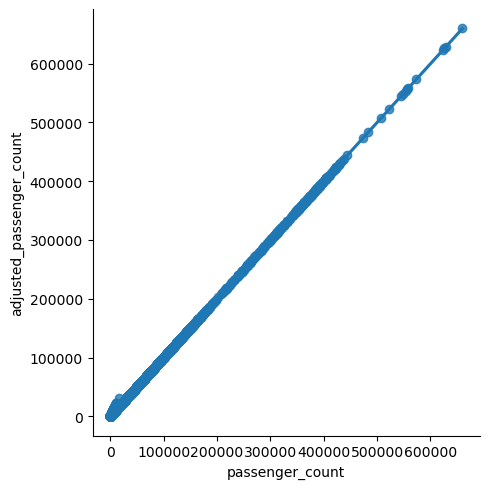

In [12]:
sns.lmplot( x = 'passenger_count' , y = 'adjusted_passenger_count' , data = df_cleaned ) # "lm" in lmplot stands for "linear model"

**Observation:** <br/>
A clear linear trend is observed, which makes sense since the adjusted count is likely derived from the raw count.

#### Pair Plot

In [15]:
cat_list=[]
num_list=[]

for i in df_cleaned.columns:
    unique_val=len(df_cleaned[i].unique())
    
    if unique_val<78:
        cat_list.append(i)
    else:
        num_list.append(i)

In [16]:
cat_list

['operating_airline',
 'operating_airline_iata_code',
 'published_airline',
 'published_airline_iata_code',
 'geo_summary',
 'geo_region',
 'activity_type_code',
 'price_category_code',
 'terminal',
 'boarding_area',
 'adjusted_activity_type_code',
 'year',
 'month']

In [17]:
num_list

['passenger_count', 'adjusted_passenger_count']

In [ ]:
sub = df_cleaned [['geo_summary' , 'geo_region' , 'price_category_code' , 'activity_type_code' , 'passenger_count' , 'adjusted_passenger_count']]

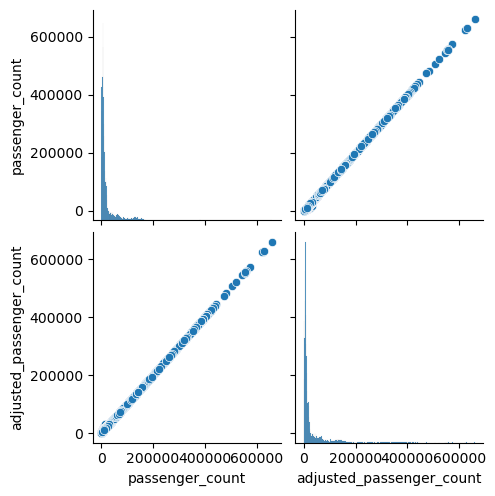

In [42]:
# Create a pair plot
p_plot = sns.pairplot(sub)
plt.show()

### 4. Categorical Analysis

#### Cat Plot

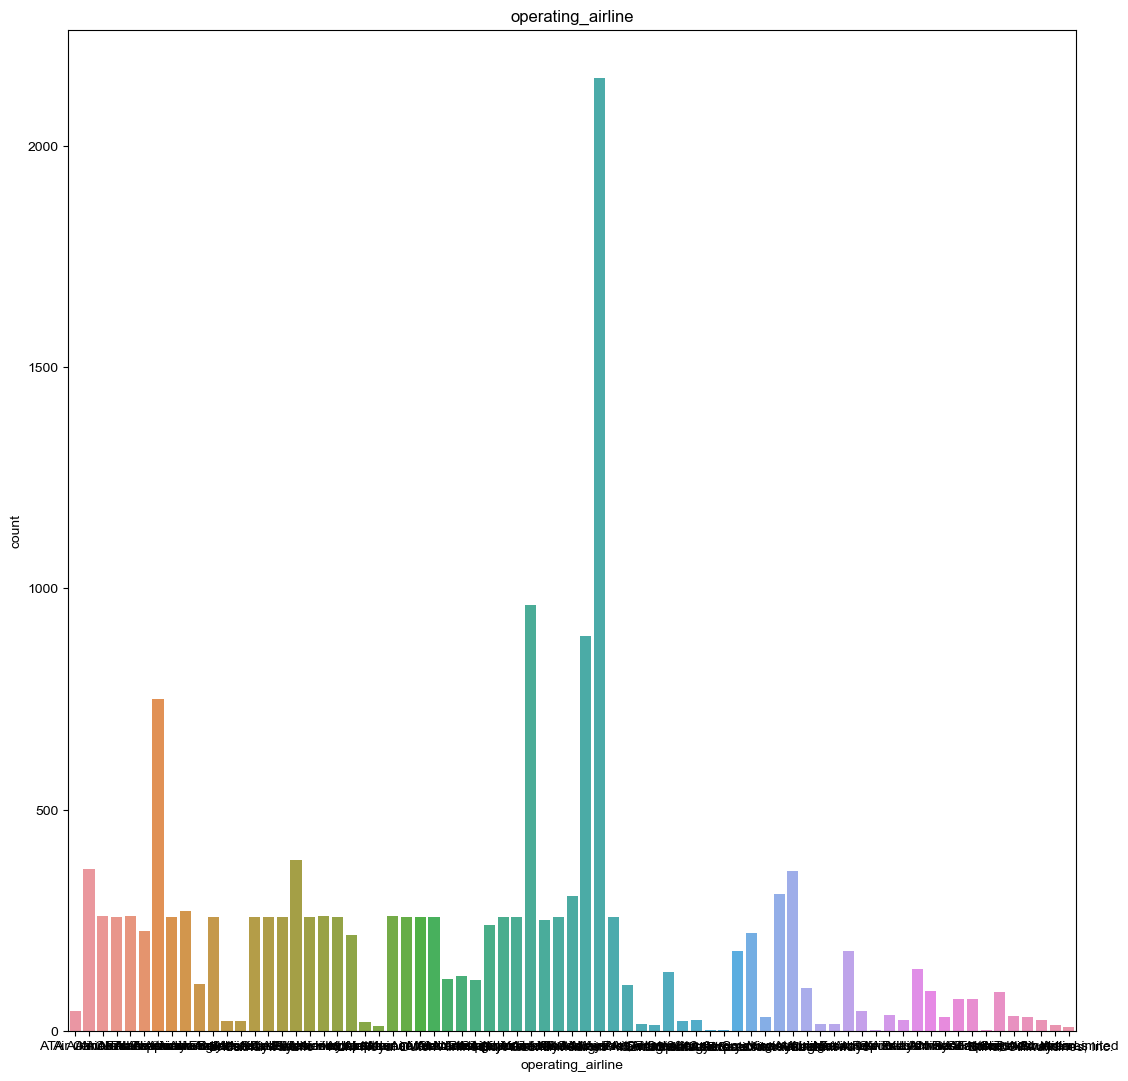

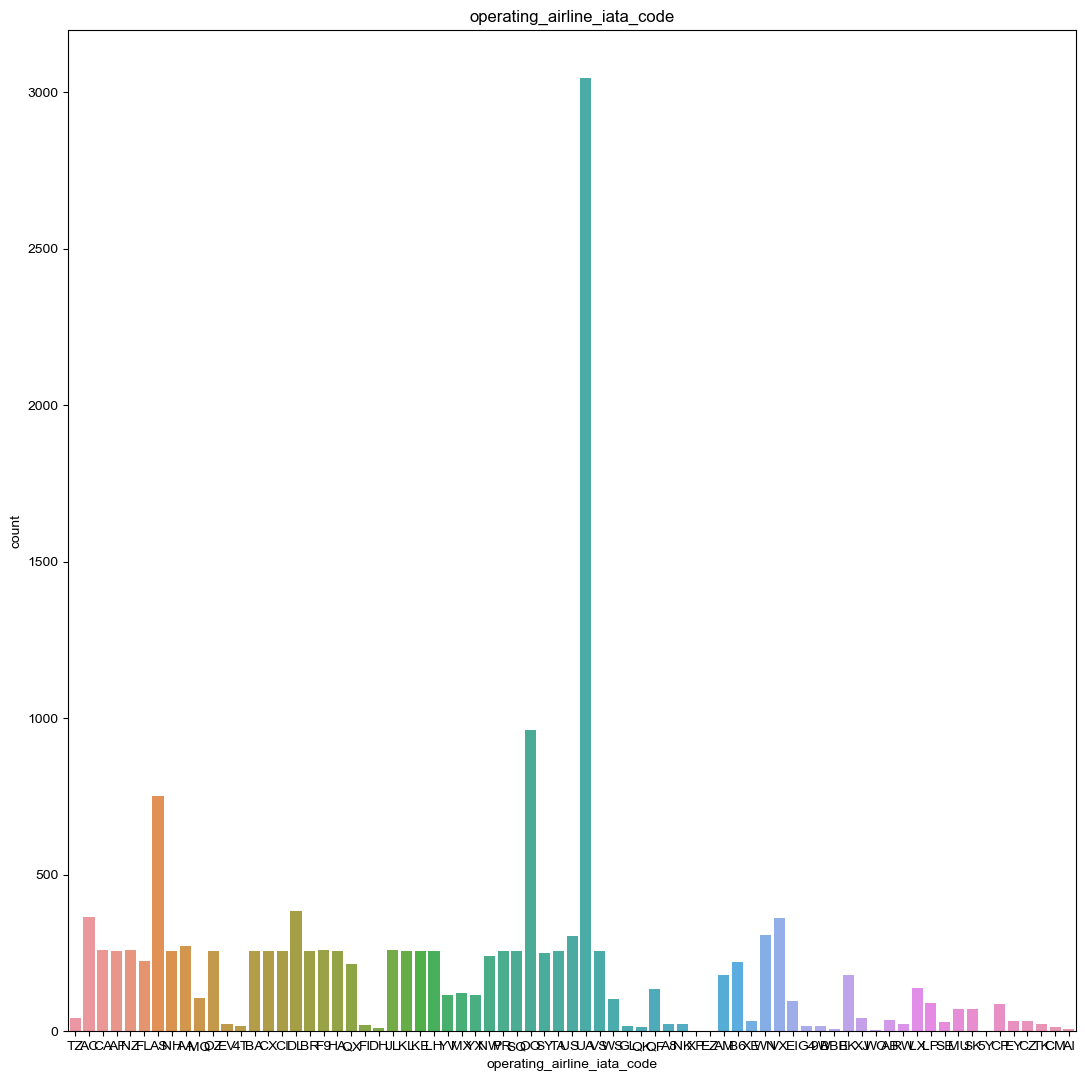

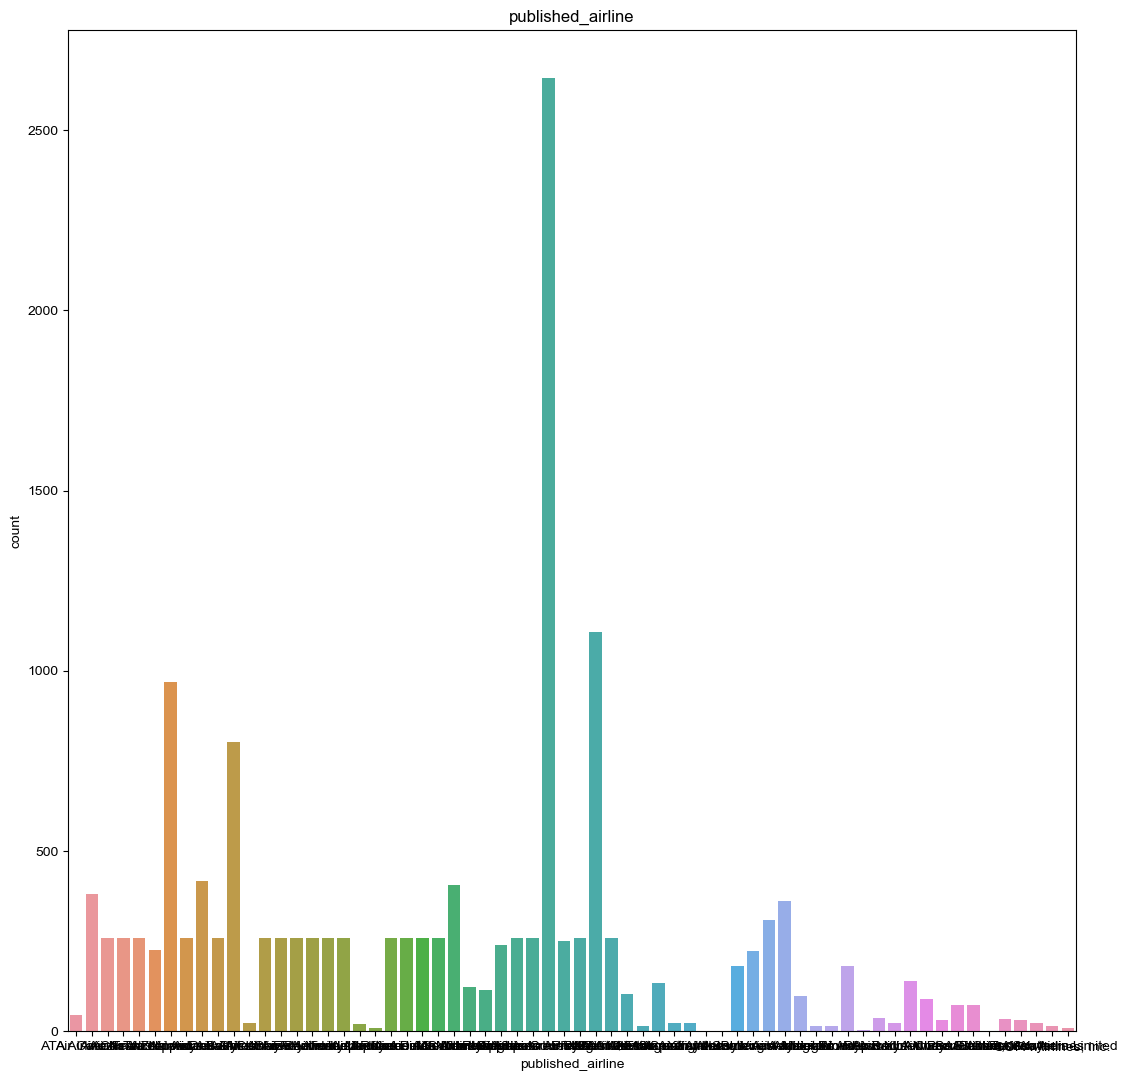

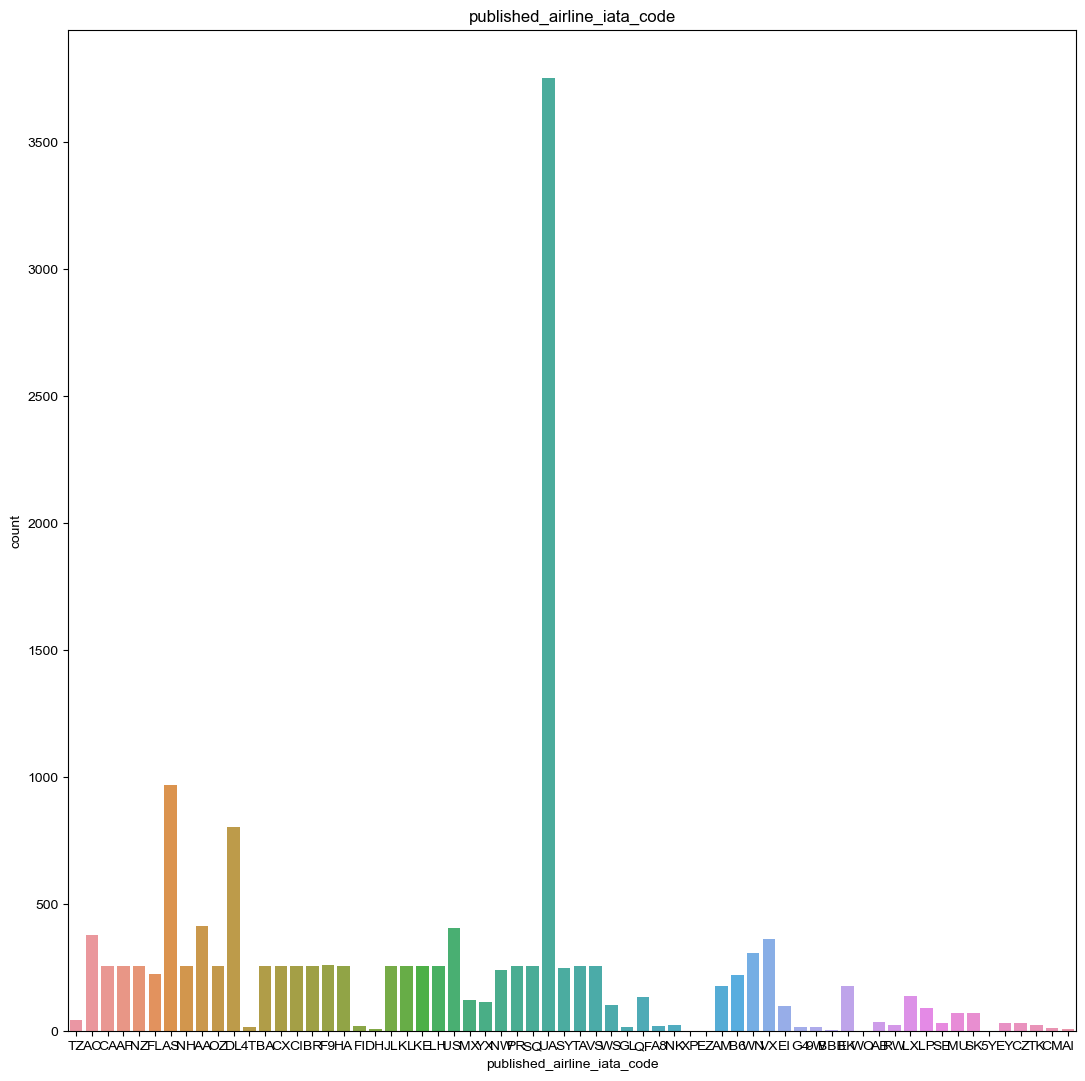

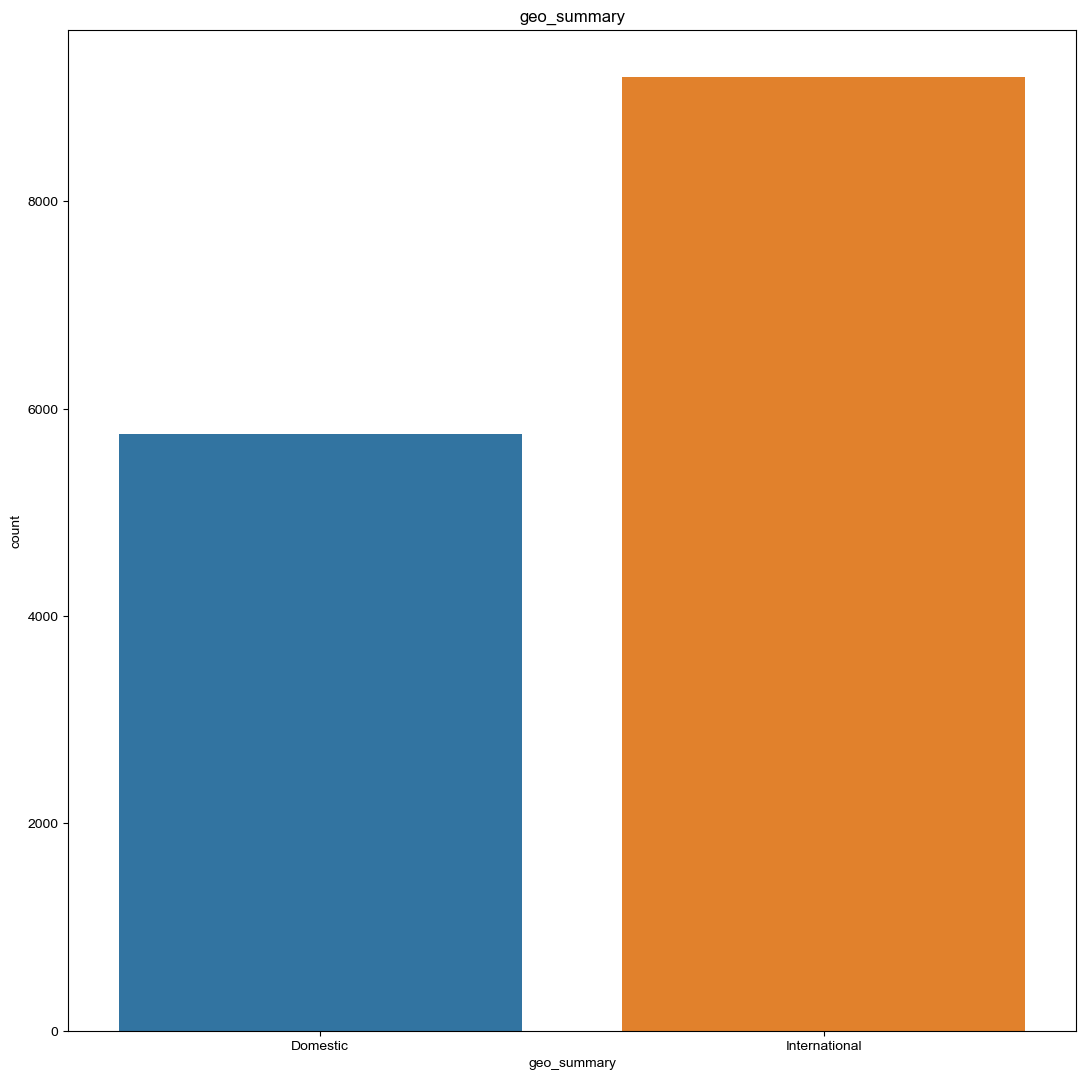

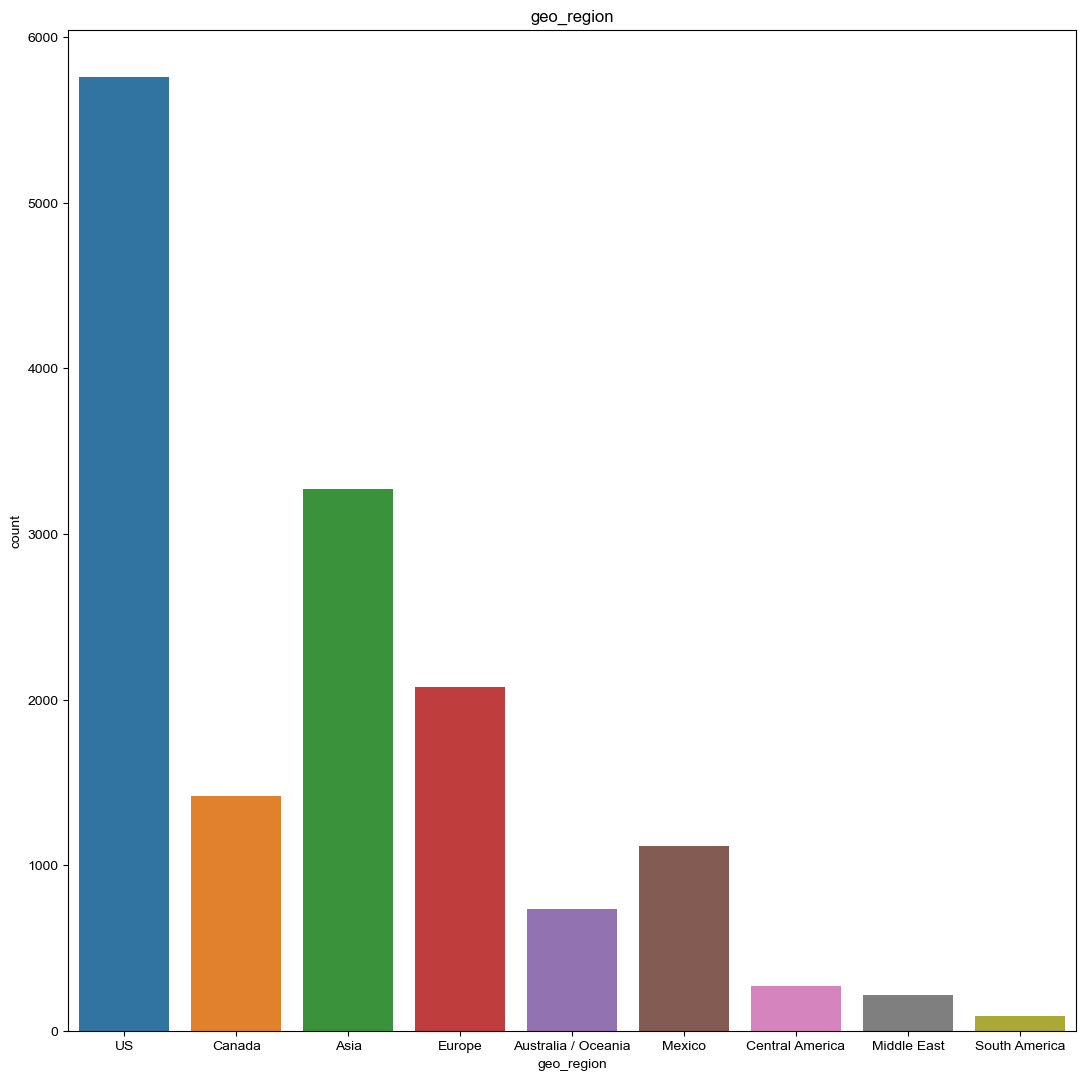

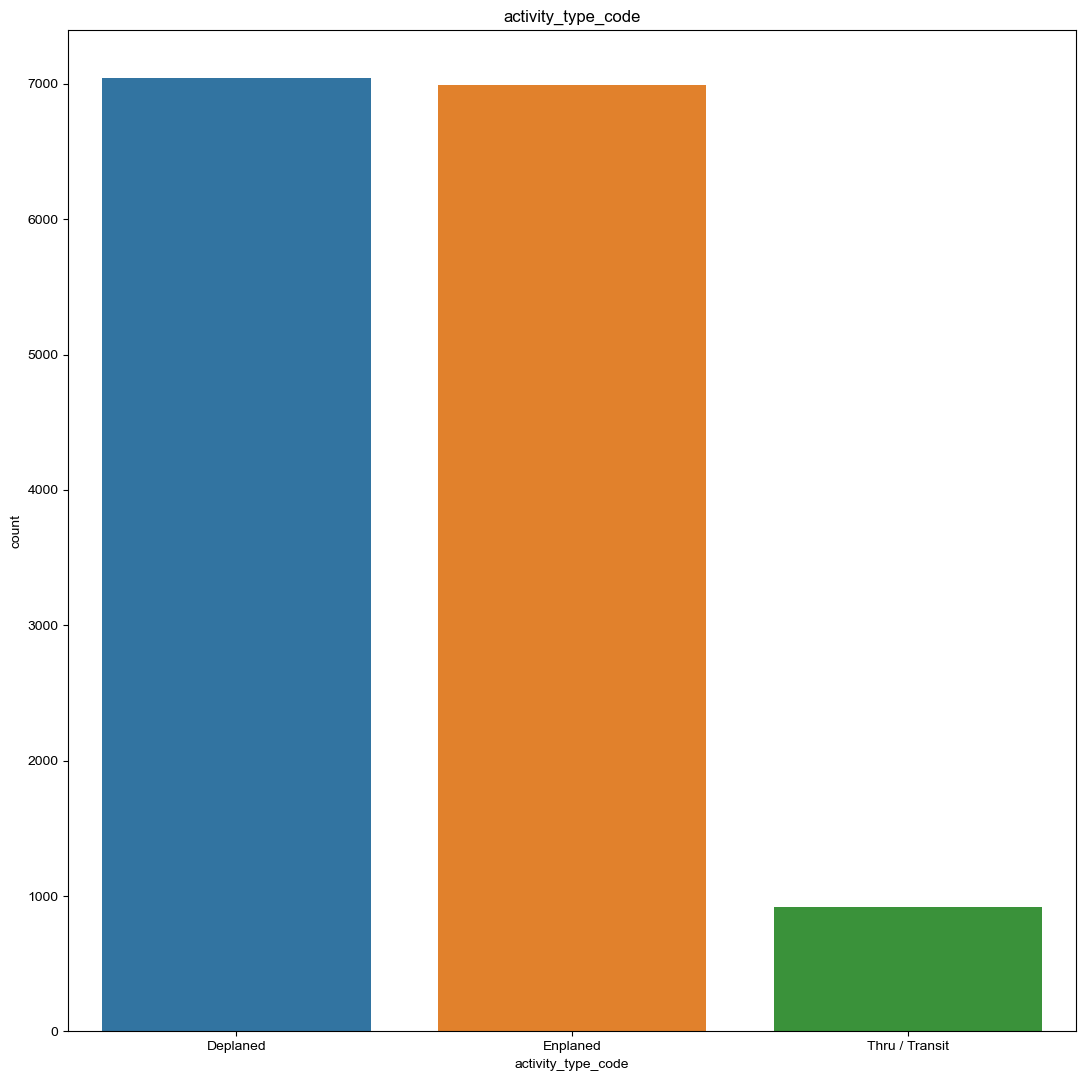

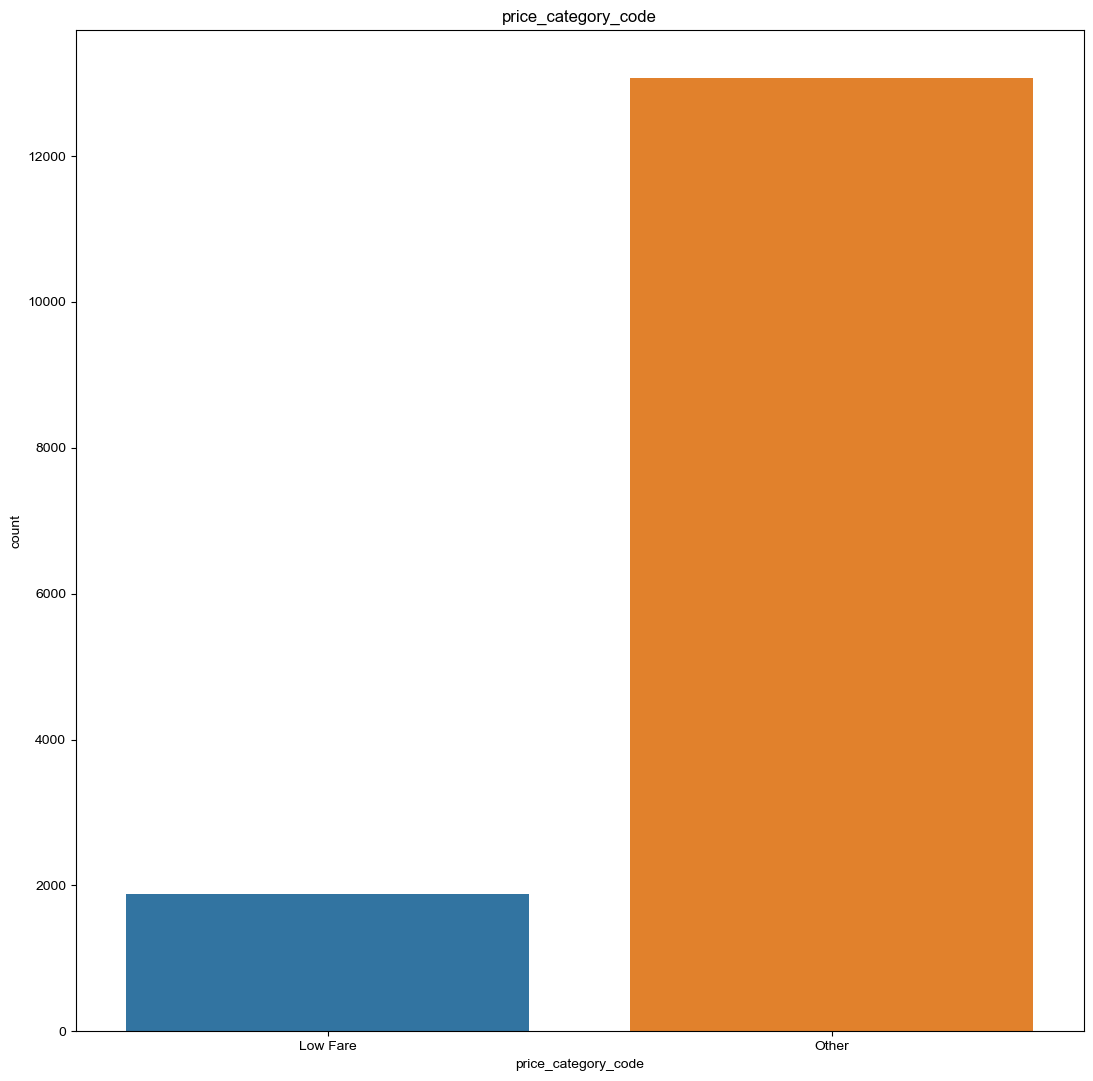

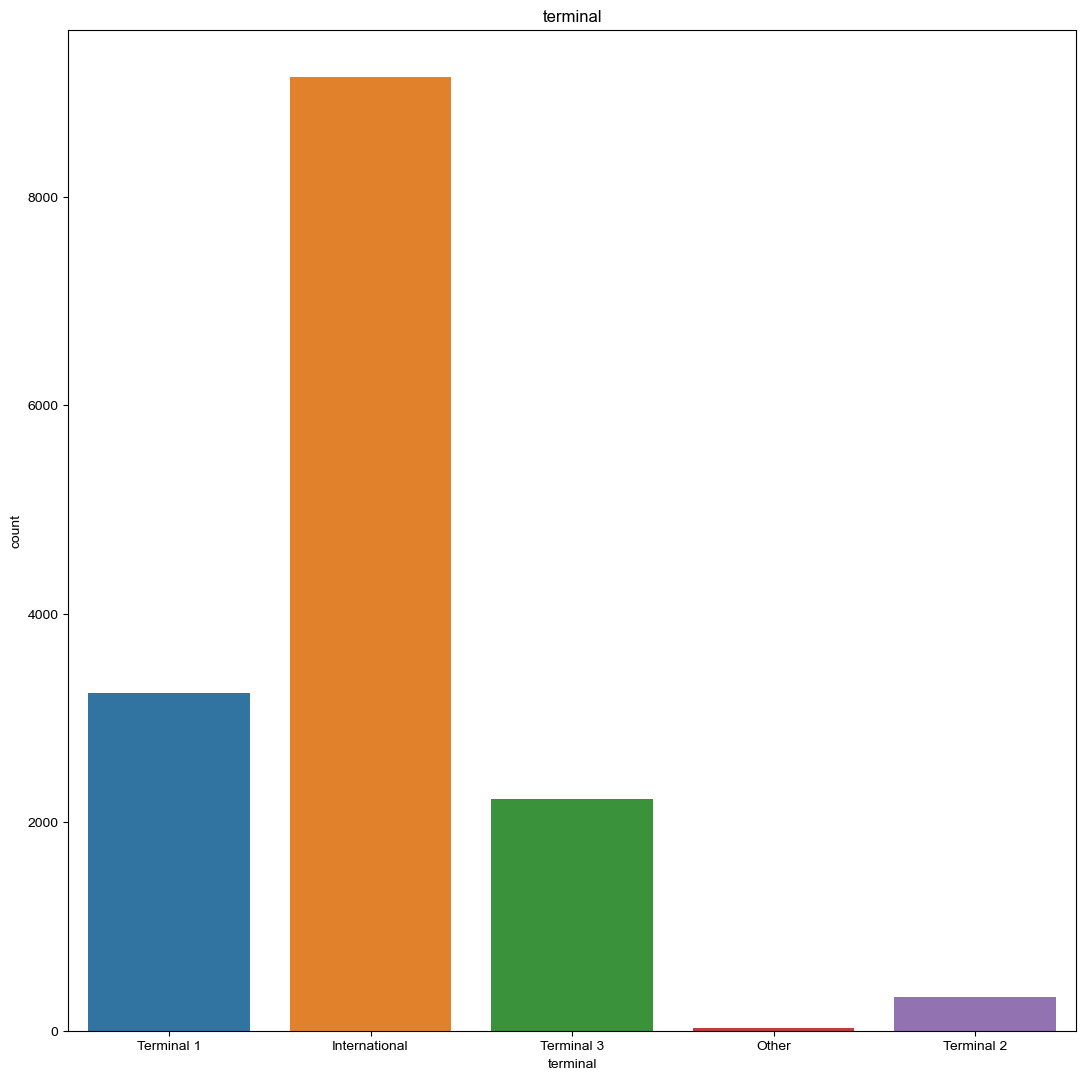

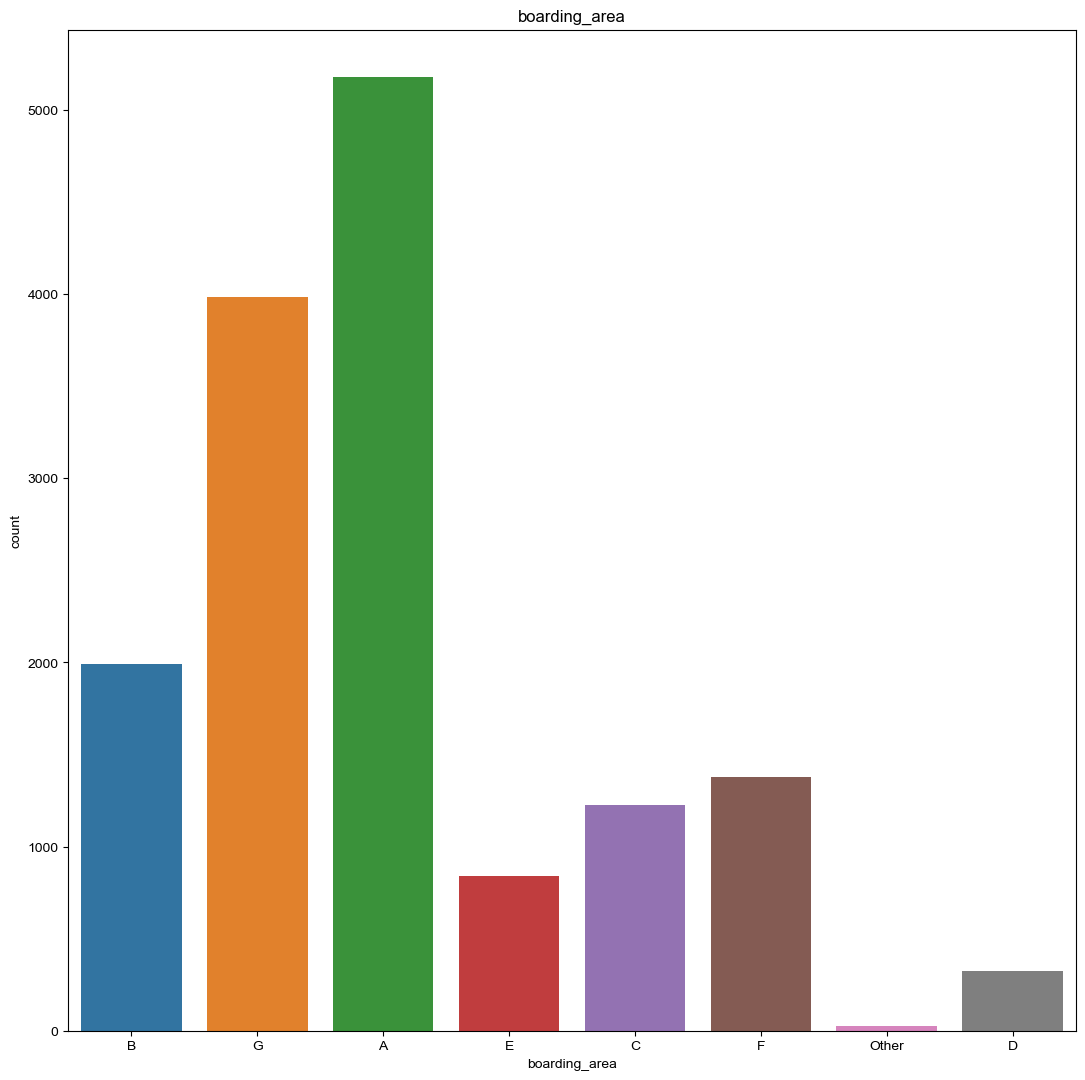

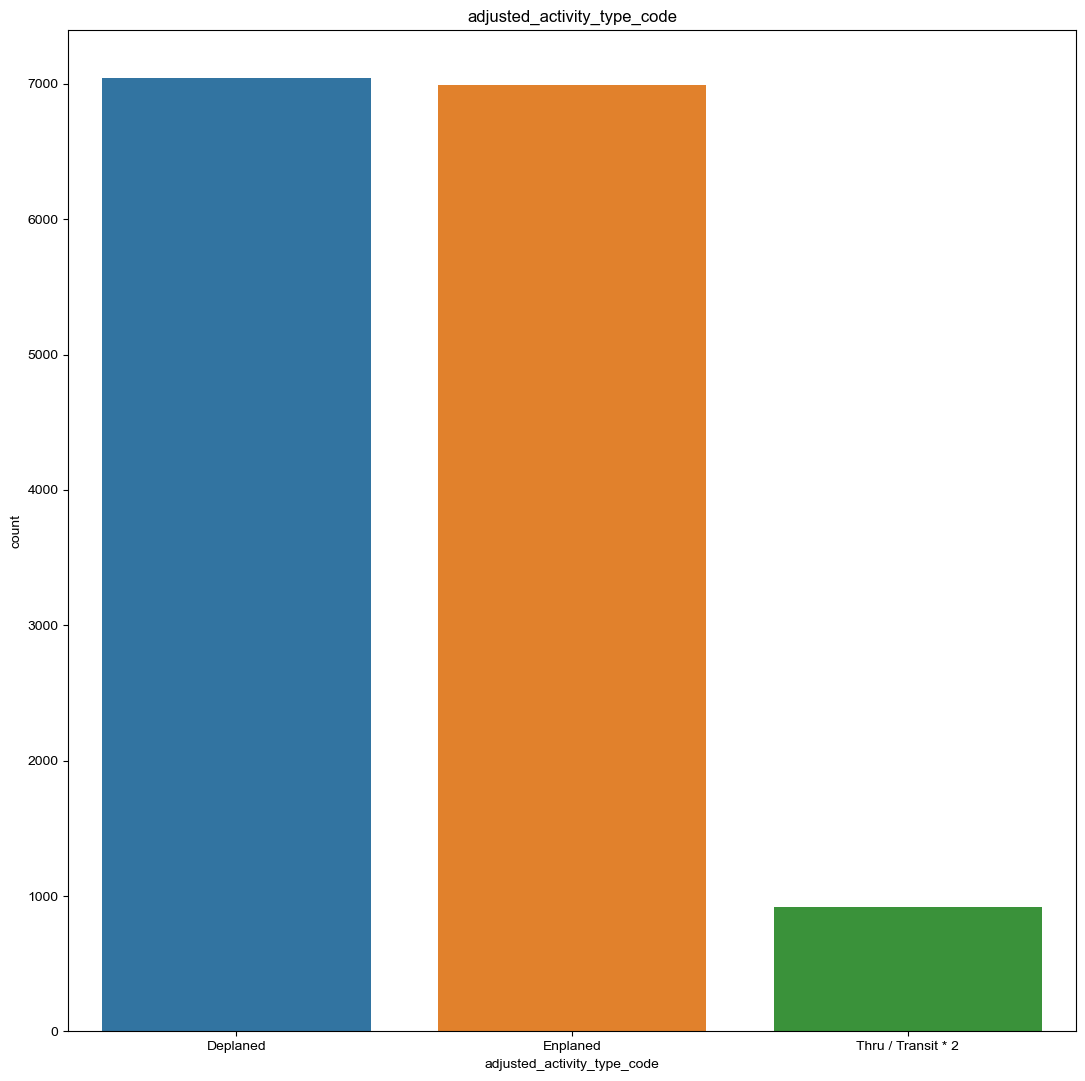

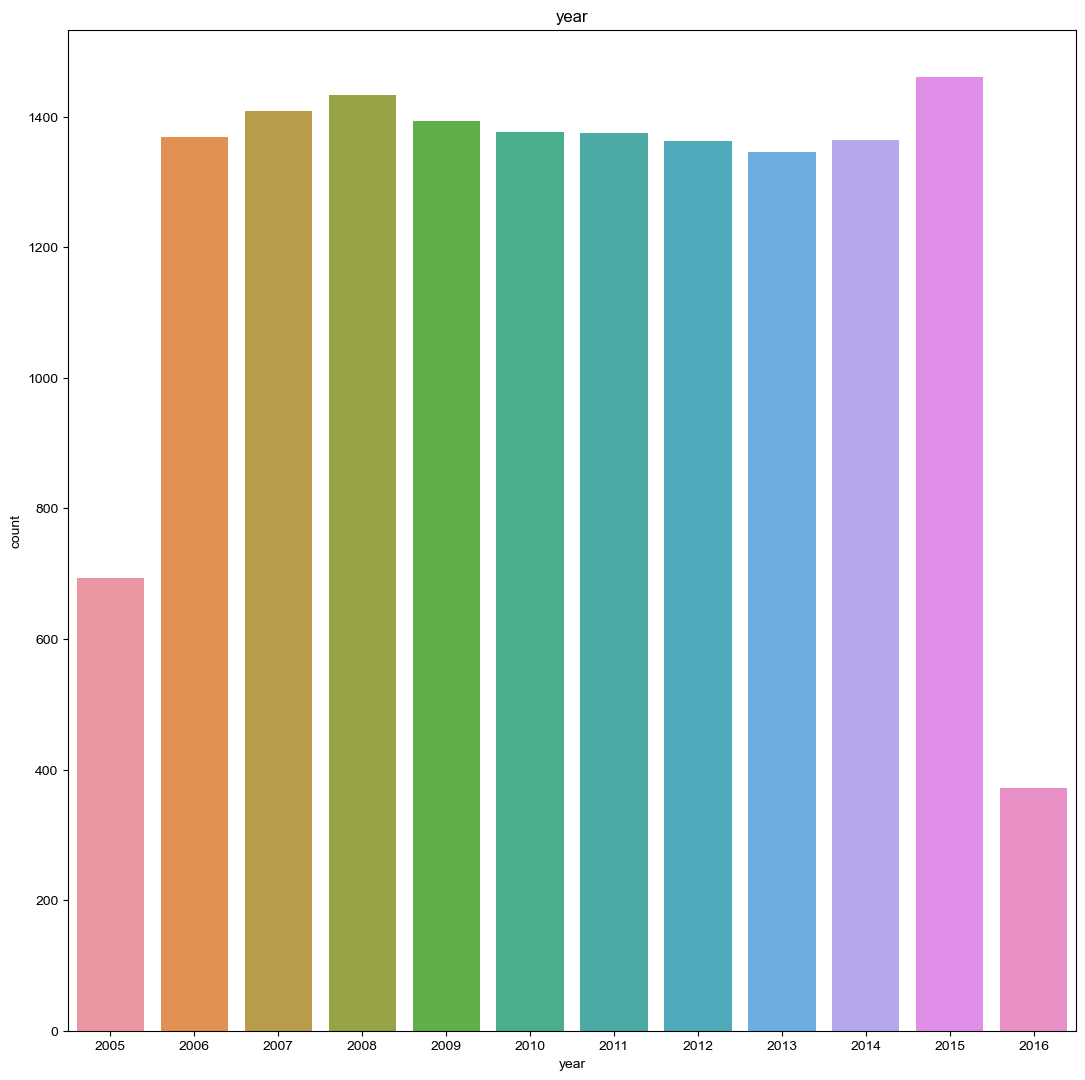

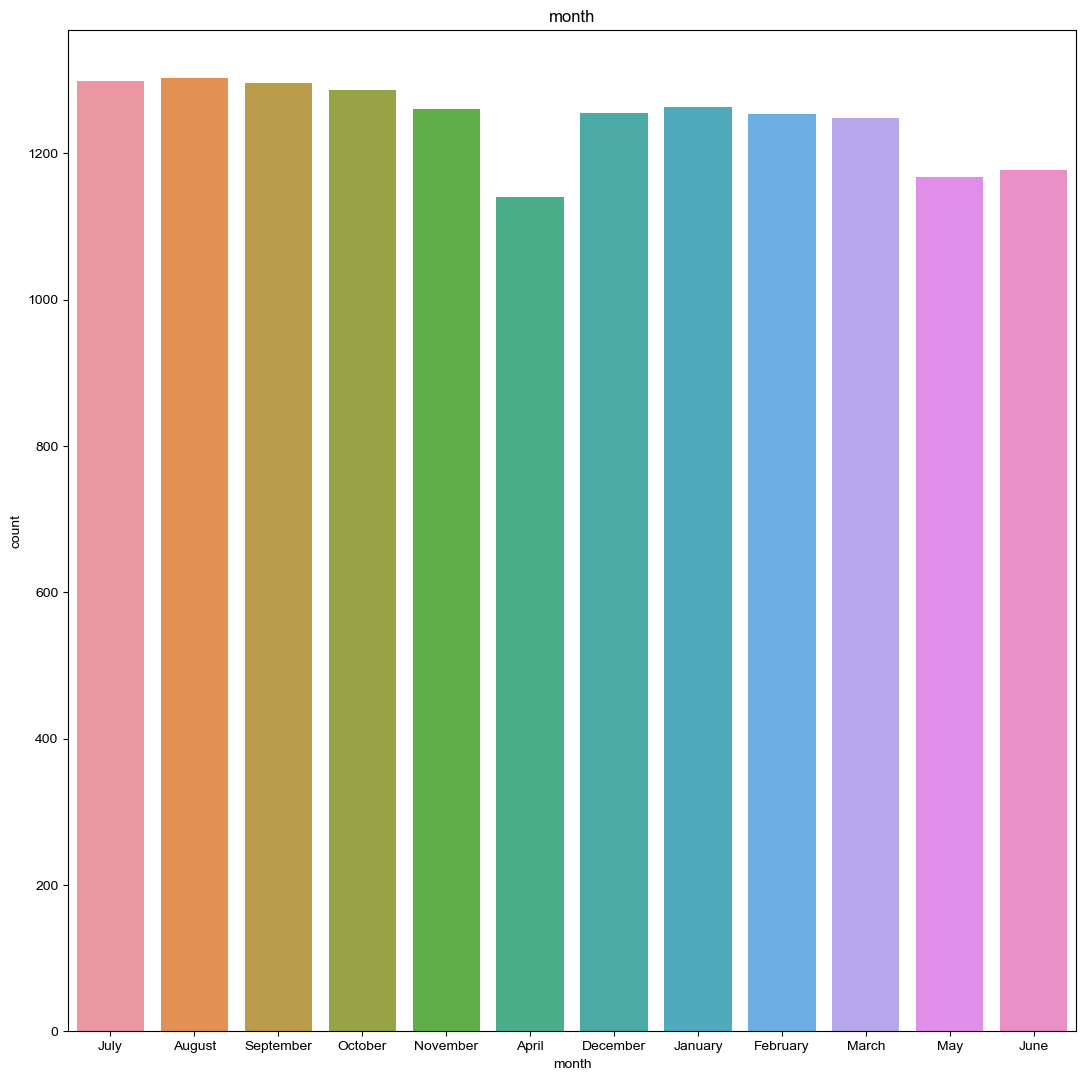

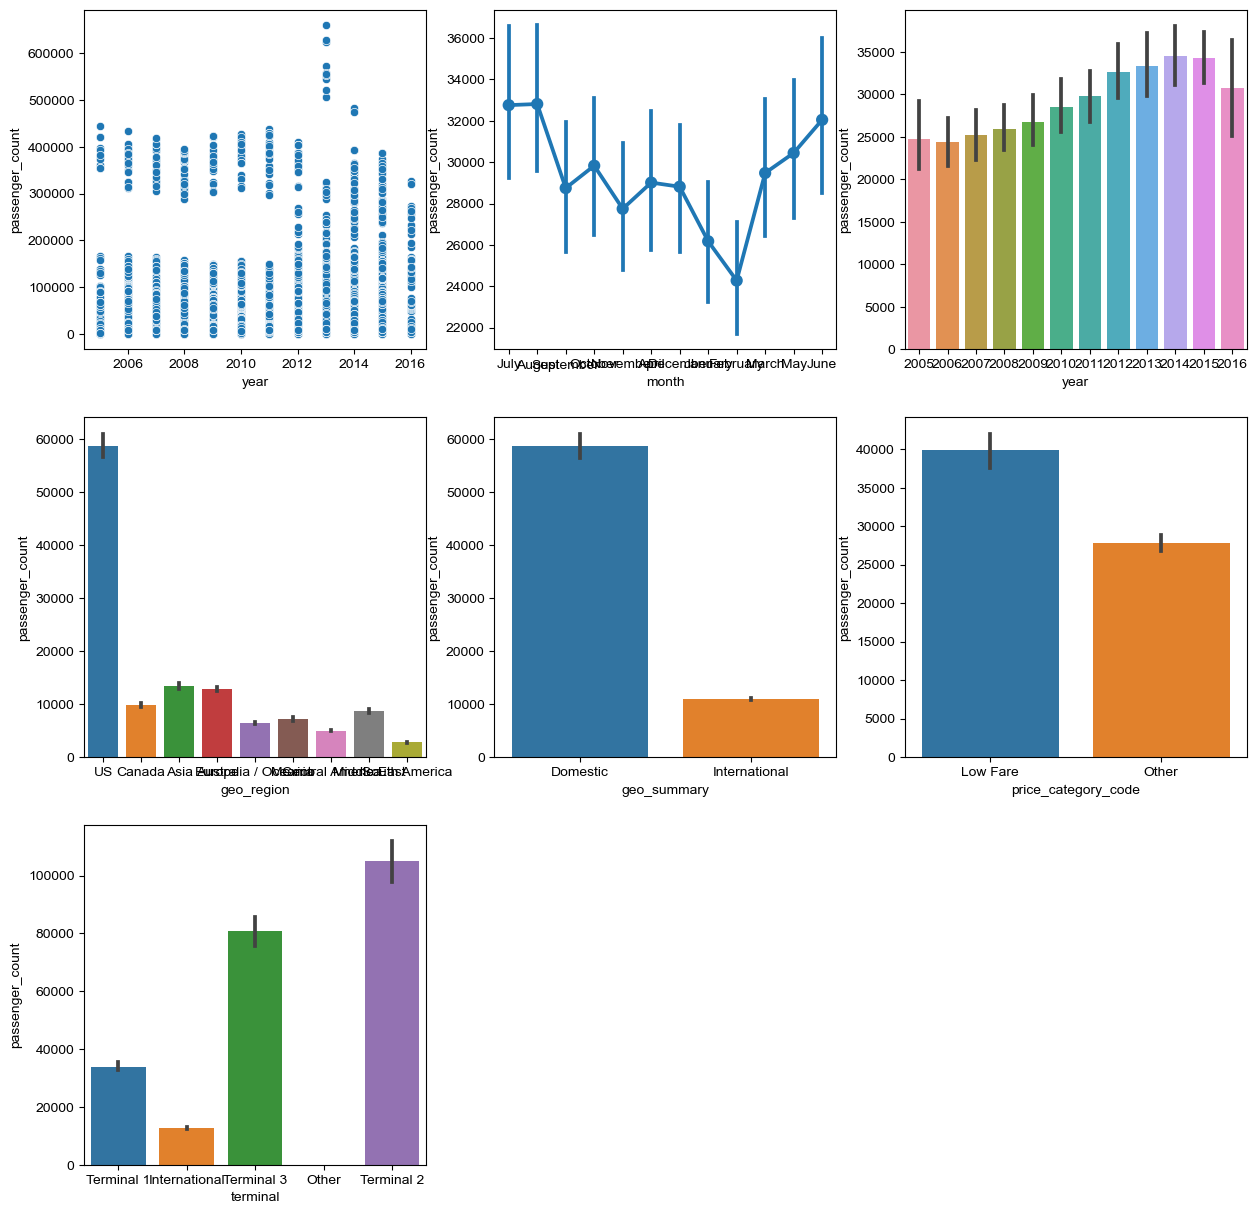

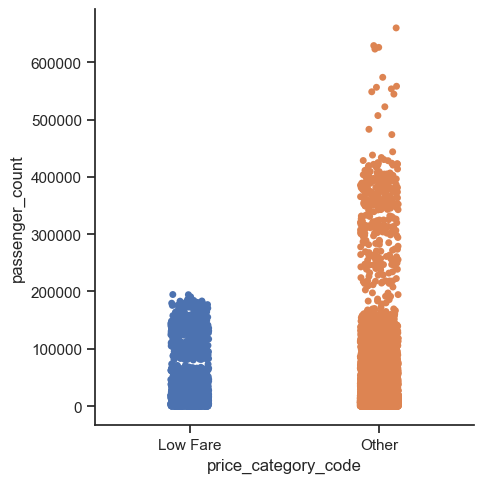

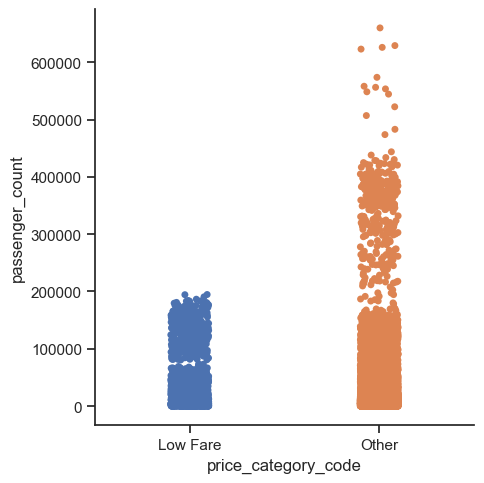

In [46]:
sns.set(style = 'ticks') # general aesthetic setting
g = sns.catplot(x = 'price_category_code' , y='passenger_count' , data = df_cleaned)
plt.show()

**Note:** <br/>
Without defining the kind parameter in seaborn.catplot(), the default plot it creates is a jittered scatterplot, which is equivalent to setting kind='strip' <br/>

In this default stripplot:

- One axis represents the categorical variable.
- The other axis represents a numerical variable.
- Each data point is plotted as a dot.
- To avoid overplotting when multiple points fall on the same categorical value, a small amount of random "jitter" is added along the categorical axis, making it easier to see the distribution of values within each category.

**Average Passenger Count by GEO Summary**

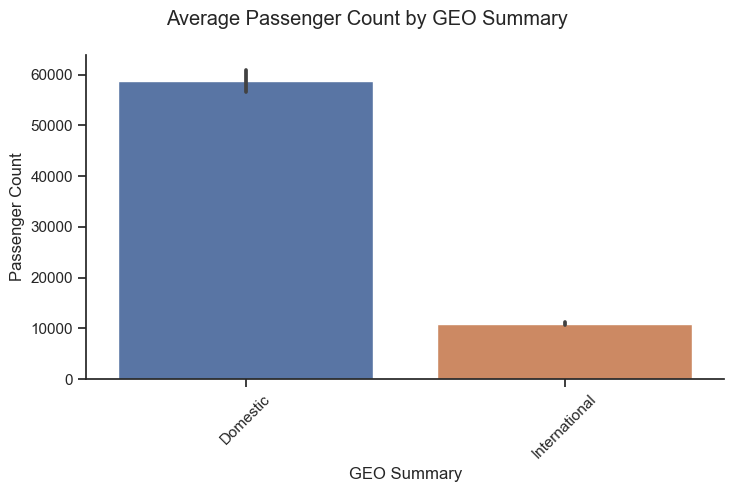

In [51]:
sns.catplot(
    data=df,
    x='GEO Summary',
    y='Passenger Count',
    kind='bar',
    height=5,
    aspect=1.5
).fig.suptitle('Average Passenger Count by GEO Summary')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation:** <br/> 
- Differences between Domestic and International passenger volumes.

**Hypothesis:**<br/>
- Domestic flights consistently carry more passengers than international flights due to higher frequency and local travel demand.

**Passenger Count Distribution by Activity Type Code (Box Plot)**

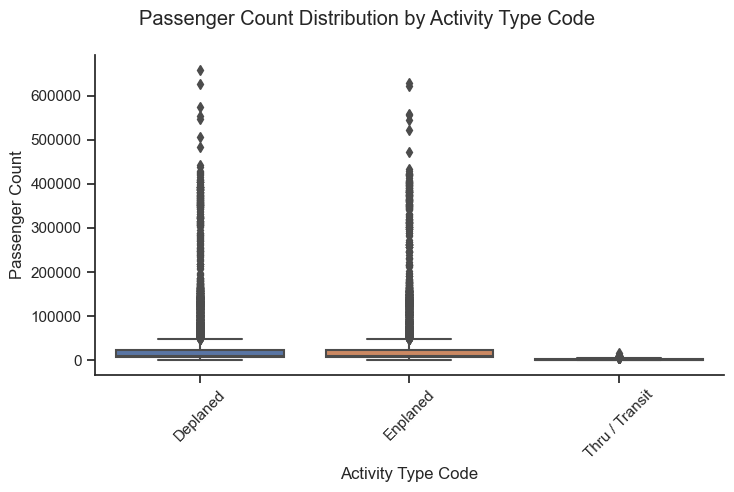

In [52]:
sns.catplot(
    data=df,
    x='Activity Type Code',
    y='Passenger Count',
    kind='box',
    height=5,
    aspect=1.5
).fig.suptitle('Passenger Count Distribution by Activity Type Code')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation:**<br/>
- Different distributions for Enplaned, Deplaned, and Transit passengers.

**Hypothesis:**<br/>
- Enplaned and deplaned counts are higher than transit due to the nature of terminal operations focusing on origin-destination traffic rather than layovers.

**Passenger Count by Month (Seasonality - Box Plot)**

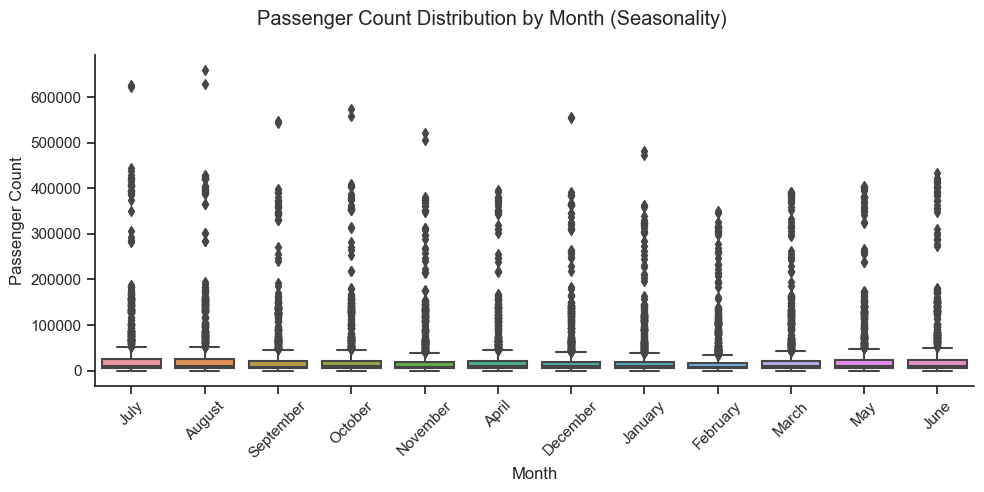

In [53]:
sns.catplot(
    data=df,
    x='Month',
    y='Passenger Count',
    kind='box',
    height=5,
    aspect=2
).fig.suptitle('Passenger Count Distribution by Month (Seasonality)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation:** <br/>
- Visible variation across months, possibly indicating seasonal travel trends.

**Hypothesis:** <br/>
- Passenger traffic peaks during summer (June–August) and holidays (November–December) due to leisure travel and holidays.

#### Count Plot

In [43]:
for i in cat_list:
    
    plt.figure(figsize=(13,13))
    sns.countplot( x=i , data=df_cleaned.loc[:,cat_list])
    plt.title(i)

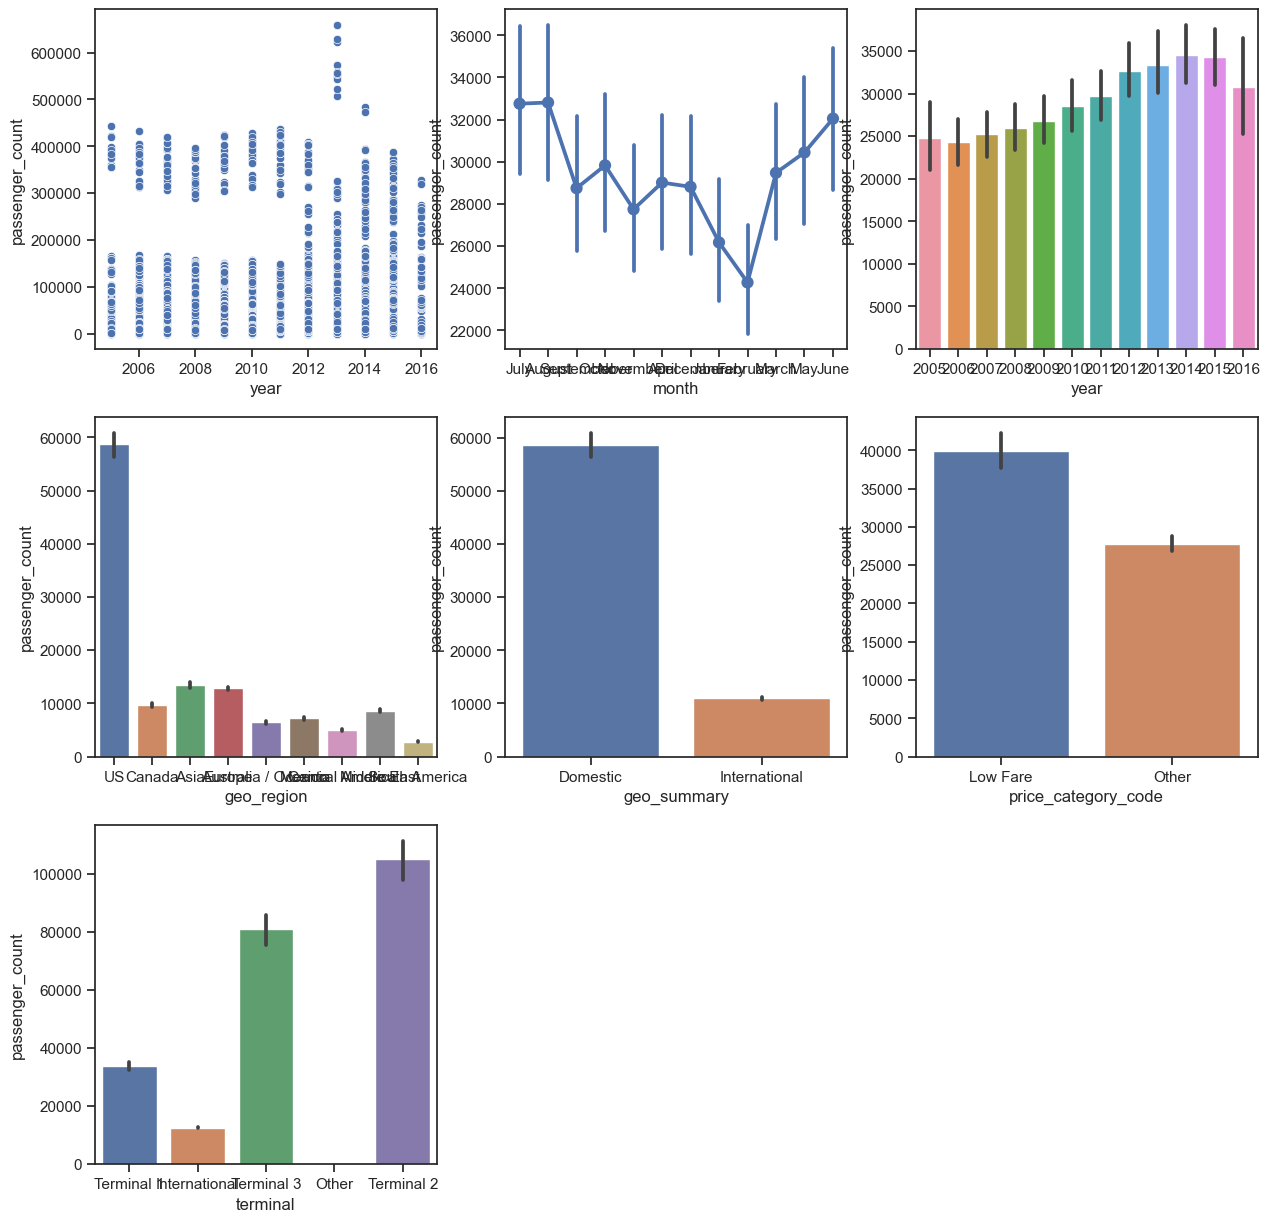

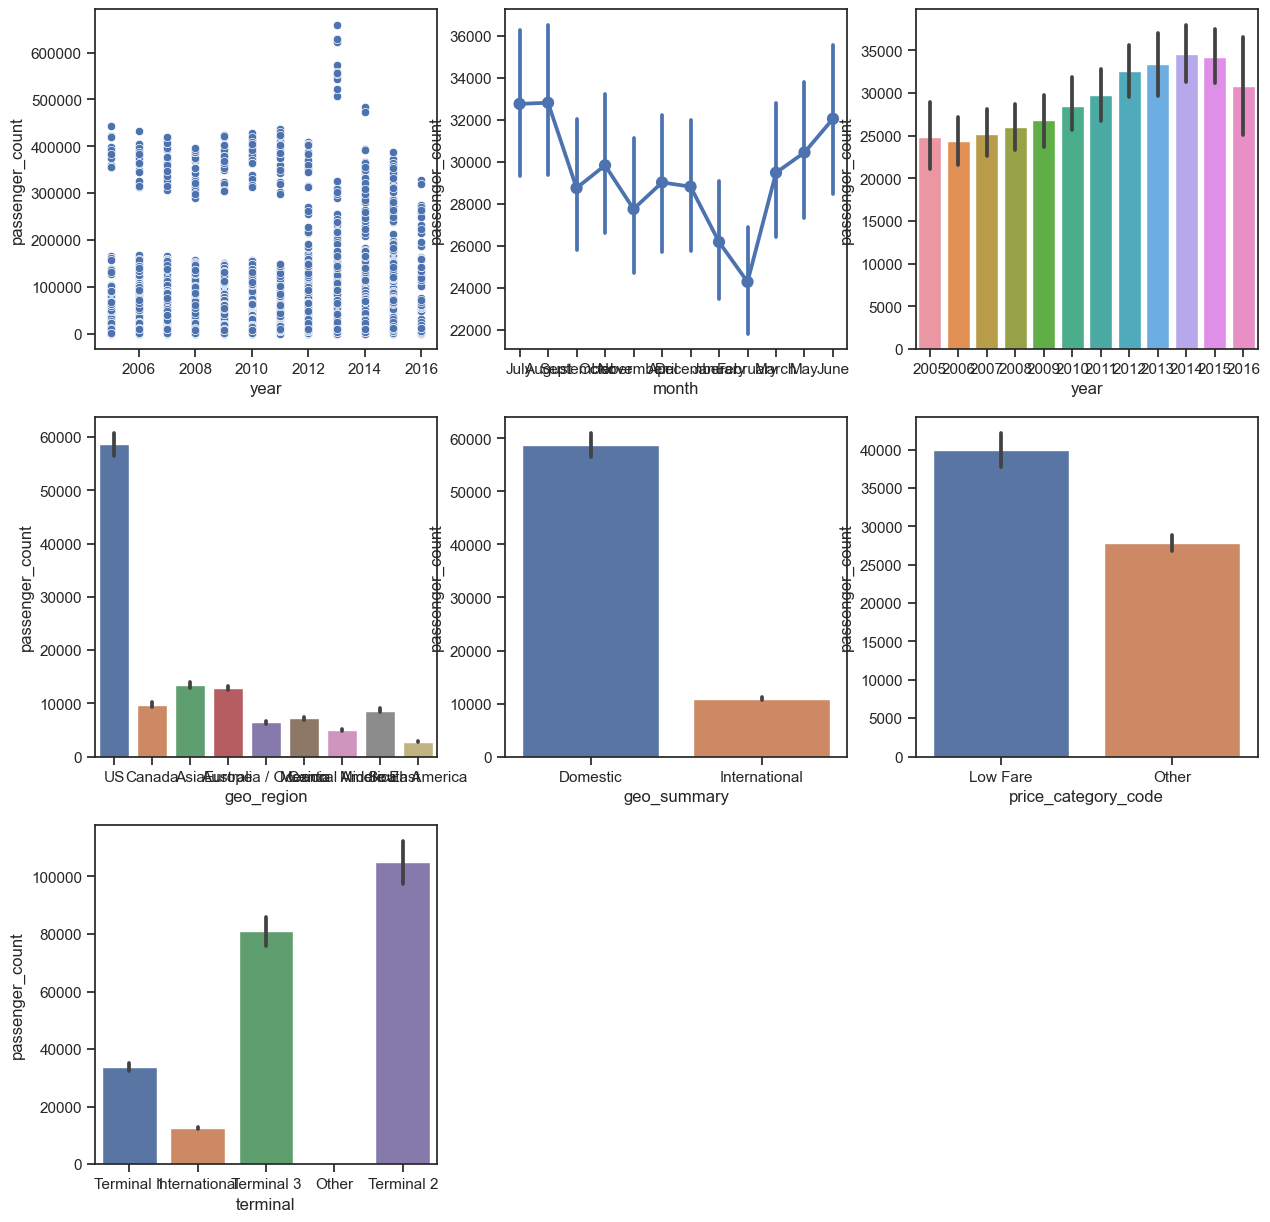

In [62]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.scatterplot(x ='year',y ='passenger_count',data = df_cleaned)
plt.subplot(3,3,2)
sns.pointplot(x="month",y="passenger_count",data=df_cleaned)
plt.subplot(3,3,3)
sns.barplot(x="year",y="passenger_count",data=df_cleaned)
plt.subplot(3,3,4)
sns.barplot(x="geo_region",y="passenger_count",data=df_cleaned)
plt.subplot(3,3,5)
sns.barplot(x="geo_summary",y="passenger_count",data=df_cleaned)
plt.subplot(3,3,6)
sns.barplot(x="price_category_code",y="passenger_count",data=df_cleaned)
plt.subplot(3,3,7)
sns.barplot(x="terminal",y="passenger_count",data=df_cleaned)
plt.show()

### 6. Correlation Heatmap in Seaborn

In [54]:
# Obtain correlation matrix
df_cleaned.corr()

,passenger_count,adjusted_passenger_count,year
passenger_count,1.000000,0.999941,0.060917
adjusted_passenger_count,0.999941,1.000000,0.059946
year,0.060917,0.059946,1.000000


In [55]:
# Create a subset excluding pertinent information
sub = df_cleaned [['geo_summary', 'geo_region','terminal',
       'boarding_area', 'passenger_count' , 'adjusted_passenger_count' ]]

- The only numerical variables except year and activity period are 'Passenger Count' and 'Adjusted Passenger Count'

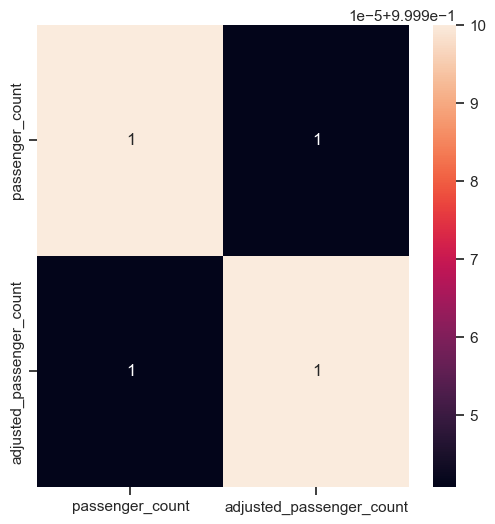

In [60]:
# Assigng figure size
plt.show()
f,ax = plt.subplots(figsize = (6,6))

# Use seaborn to creat a heatmap
corr = sns.heatmap(sub.corr(), annot =True, ax=ax)  
# ax=ax is the mechanism to direct the Seaborn heatmap to be drawn on the Matplotlib Axes object 

**Passenger Count v.s. Adjusted Passenger Count:** <br/>
These are the only two numerical variables after excluding 'Year' and 'Activity period', thus they are very similar, they both depend on the 'Activity Type Code'. <br/>
- **Adjusted Passenger Count**: the passengers under 'Thru/Transit' in 'Activity Type Code' are multiplied by 2 while the 'Deplanned' and 'Enplanned' passengers remain identical for both 'Passenger Count' and 'Adjusted Passenger Count'.
- Therefore, it is expected that both variables are highly correlated. 

**Lack of numerical values:** <br/>
Due to the nature of the dataset, there're only few numerical variable, the rest are categorical variables. Therefore, to proceed further for the correlation analysis, encoding the categorical variables will be necessary for the following steps.

### 7. Revisit Questions

> **Define Questions for Exploration:**<br/>
Which airline had the most growth in international passengers over the years in SFO airport? <br/>
Which airline has the most growth in domestic passengers over the years in SFO airport? <br/>
Which airline has the most exposure in SFO airport? **United Airlines**<br/>
Which terminal handle more domestic or international traffic in SFO airport? **Terminal 2**<br/>
Which region contributes the most passengers seasonally in SFO airport?  **US**<br/>
Can we predict passenger count using airline, region, and month?<br/>